In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

import random_forest

In [2]:
# training set
size = 100
r = 6
# blob 1
x = np.random.normal(4,2,(size))
y = np.random.normal(1,2,(size))
# blob 2
x2 = np.zeros(size)
y2 = np.zeros(size)
for i in range(size):
    x2[i] = 4+r*math.cos(2*math.pi*(i/size))# + 
    y2[i] = 1+r*math.sin(2*math.pi*(i/size))# + 
x2+=np.random.normal(0,1.5,(size))
y2+=np.random.normal(0,1.5,(size))
# blob 3
x3 = np.zeros(size)
y3 = np.zeros(size)
for i in range(size):
    x3[i] = 4+2*r*math.cos(2*math.pi*(i/size))# + 
    y3[i] = 1+2*r*math.sin(2*math.pi*(i/size))# + 
x3+=np.random.normal(0,1.5,(size))
y3+=np.random.normal(0,1.5,(size))

x = np.concatenate((x,x2,x3))
y = np.concatenate((y,y2,y3))
# add xy together 
X = np.hstack((x,y)).reshape(2,3*size).T
# reuse y for flags
i = [0,size,2*size,3*size]
y[i[0]:i[1]] = 1
y[i[1]:i[2]] = 2
y[i[2]:i[3]] = 3

# test set
s = size//3
# test set
# blob 1
tx = np.random.normal(4,1.5,s)
ty = np.random.normal(1,1.5,s)
# blob 2
tx2 = np.zeros(s)
ty2 = np.zeros(s)
for i in range(s):
    tx2[i] = 4+r*math.cos(2*math.pi*(i/s))# + 
    ty2[i] = 1+r*math.sin(2*math.pi*(i/s))# + 
tx2+=np.random.normal(0,1,s)
ty2+=np.random.normal(0,1,s)
# blob 3
tx3 = np.zeros(s)
ty3 = np.zeros(s)
for i in range(s):
    tx3[i] = 4+2*r*math.cos(2*math.pi*(i/s))# + 
    ty3[i] = 1+2*r*math.sin(2*math.pi*(i/s))# + 
tx3+=np.random.normal(0,1.5,(s))
ty3+=np.random.normal(0,1.5,(s))

tx = np.concatenate((tx,tx2,tx3))
ty = np.concatenate((ty,ty2,ty3))
# add xy together, add intercept 
tX = np.hstack((tx,ty)).reshape(2,3*s).T
# reuse y for flags
i = [0,s,2*s,3*s]
ty[i[0]:i[1]] = 1
ty[i[1]:i[2]] = 2
ty[i[2]:i[3]] = 3

In [3]:
forest = random_forest.RandomForest(n_features=2)
forest.fit(X,y)
forest.score(X,y)

0.9966666666666667

In [4]:
forest.score(tX,ty)

0.9494949494949495

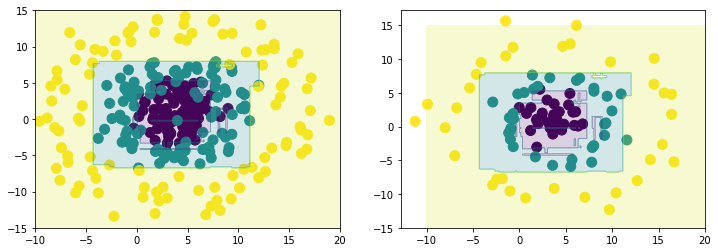

In [5]:
xxx = np.linspace(-10,20,200)
yyy = np.linspace(-15,15,200)
xx, yy = np.meshgrid(xxx,yyy)
Z = forest.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
fig, axes = plt.subplots(ncols=2,figsize=(12,4))
axes[0].scatter(X[:,0],X[:,1],c=y,s=100)
axes[1].scatter(tX[:,0],tX[:,1],c=ty,s=100)
axes[0].contourf(xx,yy,Z,alpha=0.2)
axes[1].contourf(xx,yy,Z,alpha=0.2)
plt.show()